In [ ]:
!pip install yfinance


     |████████████████████████████████| 6.3 MB 33.0 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=5baec92b41e4d1bd0503260fd18a37c8a44ef88e770fd22c8b478e46a4fea885
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install bsedata


import yfinance as yf


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from bsedata.bse import BSE
b = BSE()


In [ ]:
b.getQuote('500010')

{'2WeekAvgQuantity': '1.41 Lakh',
 '52weekHigh': '2895.35',
 '52weekLow': '1623.00',
 'buy': {'1': {'price': '2549.80', 'quantity': '34'},
  '2': {'price': '2549.75', 'quantity': '22'},
  '3': {'price': '2549.65', 'quantity': '93'},
  '4': {'price': '2549.60', 'quantity': '100'},
  '5': {'price': '2549.30', 'quantity': '20'}},
 'change': '5.80',
 'companyName': 'HOUSING DEVELOPMENT FINANCE CORP.LTD.',
 'currentValue': '2550.40',
 'dayHigh': '2558.00',
 'dayLow': '2546.10',
 'faceValue': '2.00',
 'group': 'A  / S&P BSE SENSEX',
 'industry': 'Housing Finance',
 'lowerPriceBand': '',
 'marketCapFreeFloat': '4,60,473.65 Cr.',
 'marketCapFull': '4,60,473.65 Cr.',
 'pChange': '0.23',
 'previousClose': '2544.60',
 'previousOpen': '2558.00',
 'priceBand': '',
 'scripCode': '500010',
 'securityID': 'HDFC',
 'sell': {'1': {'price': '2551.40', 'quantity': '1'},
  '2': {'price': '2551.50', 'quantity': '23'},
  '3': {'price': '2551.55', 'quantity': '52'},
  '4': {'price': '2551.70', 'quantity': '93

In [ ]:
x = yf.download('TRIVENI.NS')

[*********************100%***********************]  1 of 1 completed


In [ ]:
import pandas as pd
tickers = ["TRIVENI.NS","TATAPOWER.NS"]

close_prices = pd.DataFrame() # dataframe to store close price of each ticker
attempt = 0 # initializing passthrough variable
drop = []

In [ ]:
while len(tickers) != 0 and attempt <= 5:
    tickers = [j for j in tickers if j not in drop] # removing stocks whose data has been extracted from the ticker list
    for i in range(len(tickers)):
        try:
            temp = yf.download(tickers[i])
            temp.dropna(inplace = True)
            close_prices[tickers[i]] = temp["Adj Close"]
            drop.append(tickers[i])       
        except:
            print(tickers[i]," :failed to fetch data...retrying")
            continue
    attempt+=1

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
close_prices

,TRIVENI.NS,TATAPOWER.NS
Date,,
2005-12-13,31.384119,32.295036
2005-12-14,32.473015,32.175491
2005-12-15,31.940664,32.237080
2005-12-16,31.045366,32.465275
2005-12-19,33.029560,32.776775
...,...,...
2021-06-07,167.949997,113.349998
2021-06-08,187.449997,117.050003
2021-06-09,187.800003,124.650002


In [ ]:
close_prices.mean() # prints mean stock price for each stock
close_prices.median() # prints median stock price for each stock
close_prices.std() # prints standard deviation of stock price for each stock

daily_return = close_prices.pct_change() # Creates dataframe with daily return for each stock


In [ ]:
#daily_return.mean() # prints mean daily return for each stock
daily_return.std() # prints standard deviation of daily returns for each stock


TRIVENI.NS      0.037225
TATAPOWER.NS    0.024153
dtype: float64

In [ ]:
daily_return.rolling(window=20).mean() # simple moving average
daily_return.rolling(window=20).std()



NameError: ignored

In [ ]:
daily_return.ewm(span=20,min_periods=20).mean() # exponential moving average
daily_return.ewm(span=20,min_periods=20).std()

,TRIVENI.NS,TATAPOWER.NS
Date,,
2005-12-13,NaN,NaN
2005-12-14,NaN,NaN
2005-12-15,NaN,NaN
2005-12-16,NaN,NaN
2005-12-19,NaN,NaN
...,...,...
2021-06-04,0.032912,0.020203
2021-06-07,0.043260,0.023546
2021-06-08,0.050822,0.023670


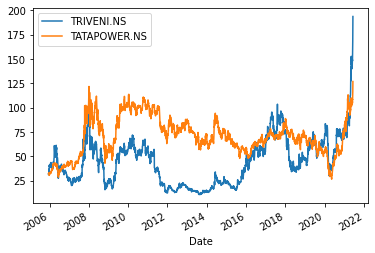

In [ ]:
close_prices.plot() # Plot of all the stocks superimposed on the same chart



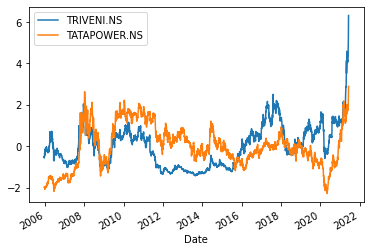

In [ ]:
cp_standardized = (close_prices - close_prices.mean())/close_prices.std() # Standardization
cp_standardized.plot() # Plot of all the stocks standardized and superimposed on the same chart



<BarContainer object of 2 artists>

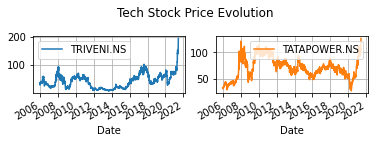

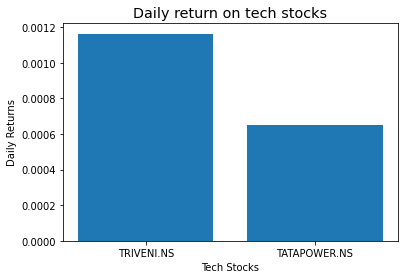

In [ ]:
close_prices.plot(subplots=True, layout = (3,2), title = "Tech Stock Price Evolution", grid =True) # Subplots of the stocks


# Pyplot demo
fig, ax = plt.subplots()
plt.style.available
plt.style.use('ggplot')
ax.set(title="Daily return on tech stocks", xlabel="Tech Stocks", ylabel = "Daily Returns")
plt.bar(daily_return.columns,daily_return.mean())

In [ ]:
drop =[]
attempt =0
ticker = ["TRIVENI.NS"]
ticker_data = pd.DataFrame()

for i in ticker:
        try:
            ticker_data = yf.download(i,start="2017-01-01", end="2021-06-11")
            
        except:
            print(i," :failed to fetch data...retrying")
            continue
    

[*********************100%***********************]  1 of 1 completed


In [ ]:
ticker_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,61.000000,64.199997,60.349998,63.900002,62.006310,1974476
2017-01-03,63.950001,69.099998,63.549999,66.900002,64.917404,3441833
2017-01-04,67.300003,68.300003,64.199997,64.750000,62.831116,1000433
2017-01-05,65.349998,67.300003,64.900002,66.000000,64.044075,632367
2017-01-06,66.000000,68.300003,64.300003,66.099998,64.141106,1286944
...,...,...,...,...,...,...
2021-06-04,153.449997,154.899994,149.850006,151.750000,151.750000,1170813
2021-06-07,154.300003,174.500000,154.300003,167.949997,167.949997,5188285
2021-06-08,169.500000,198.300003,161.449997,187.449997,187.449997,7113704


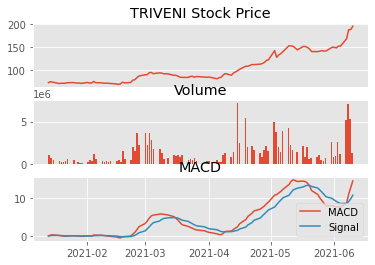

Text(0.5, 0.98, 'Stock Price with MACD')

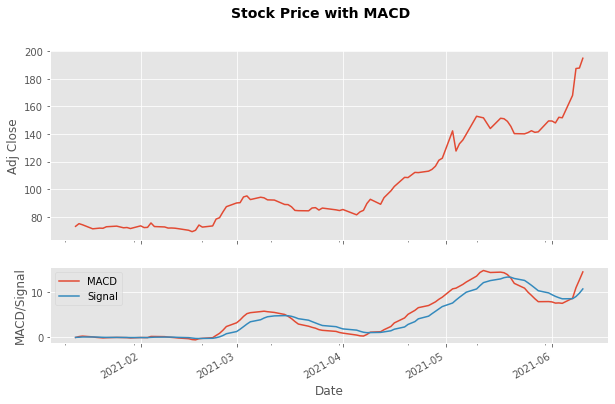

In [ ]:
import pandas_datareader.data as pdr
import datetime

def MACD(DF,a,b,c): 
    """function to calculate MACD
       typical values a = 12; b =26, c =9"""
    df = DF.copy()
    df["MA_Fast"]=df["Adj Close"].ewm(span=a,min_periods=a).mean()
    df["MA_Slow"]=df["Adj Close"].ewm(span=b,min_periods=b).mean()
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    df["Signal"]=df["MACD"].ewm(span=c,min_periods=c).mean()
    df.dropna(inplace=True)
    return df

# Visualization - plotting MACD/signal along with close price and volume for last 100 data points
df = MACD(ticker_data, 12, 26, 9)

plt.subplot(311)
plt.plot(df.iloc[-100:,4])
plt.title('TRIVENI Stock Price')
plt.xticks([])

plt.subplot(312)
plt.bar(df.iloc[-100:,5].index, df.iloc[-100:,5].values)
plt.title('Volume')
plt.xticks([])

plt.subplot(313)
plt.plot(df.iloc[-100:,[-2,-1]])
plt.title('MACD')
plt.legend(('MACD','Signal'),loc='lower right')

plt.show()


# Visualization - Using object orient approach
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2.5, 1]})  # subplot function 
df.iloc[-100:,4].plot(ax=ax0)
ax0.set(ylabel='Adj Close')

df.iloc[-100:,[-2,-1]].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='MACD/Signal')

# Title the figure
fig.suptitle('Stock Price with MACD', fontsize=14, fontweight='bold')



In [ ]:
#ATR Bollinger

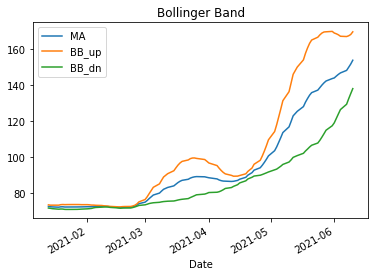

In [ ]:

def ATR(DF,n):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    #df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2


def BollBnd(DF,n):
    "function to calculate Bollinger Band"
    df = DF.copy()
    df["MA"] = df['Adj Close'].rolling(n).mean()
    df["BB_up"] = df["MA"] + 2*df["MA"].rolling(n).std()
    df["BB_dn"] = df["MA"] - 2*df["MA"].rolling(n).std()
    df["BB_width"] = df["BB_up"] - df["BB_dn"]
    df.dropna(inplace=True)
    return df

# Visualizing Bollinger Band of the stocks for last 100 data points
BollBnd(ticker_data,20).iloc[-100:,[-4,-3,-2]].plot(title="Bollinger Band")

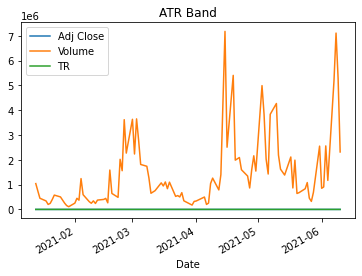

In [ ]:
ATR(ticker_data,20).iloc[-100:,[-4,-3,-2]].plot(title="ATR Band")

In [ ]:
#RSI 
def RSI(DF,n):
    "function to calculate RSI"
    df = DF.copy()
    df['delta']=df['Adj Close'] - df['Adj Close'].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0)
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0)
    avg_gain = []
    avg_loss = []
    gain = df['gain'].tolist()
    loss = df['loss'].tolist()
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n)
            avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
    df['avg_gain']=np.array(avg_gain)
    df['avg_loss']=np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    return df['RSI']

In [ ]:
# Calculating RSI without using loop
def rsi(df, n):
    "function to calculate RSI"
    delta = df["Adj Close"].diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[n-1]] = np.mean( u[:n] ) #first value is sum of avg gains
    u = u.drop(u.index[:(n-1)])
    d[d.index[n-1]] = np.mean( d[:n] ) #first value is sum of avg losses
    d = d.drop(d.index[:(n-1)])
    rs = pd.stats.moments.ewma(u, com=n-1, adjust=False) / \
         pd.stats.moments.ewma(d, com=n-1, adjust=False)

In [ ]:
#ADX 
def ATR(DF,n):
  df = DF.copy()
  df['H-L'] = abs(df['High'] - df['Low'])
  df['H-PC']=abs(df['High']- df['Adj Close'].shift(1))
  df['L-PC']=abs(df['Low']- df['Adj Close'].shift(1))
  df['TR'] = df[['H-L','H-PC','L-PC']].max(axis=1, skipna=False)
  df['ATR'] = df['TR'].rolling(n).mean()
  df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
  return df2

def ADX(DF,n):
  df = DF.copy()
  df['TR'] = ATR(df,n)['TR']
  df['DMPlus'] = np.where((df['High']-df['High'].shift(1)) > (df['Low'].shift(1) - df['Low']), max((df['High']-df['High'].shift(1)), 0),0)
  df['DMMinus'] = np.where(df['Low'].shift(1) - df['Low']>df['High']-df['High'].shift(1), max((df['Low'].shift(1) - df['Low']), 0),0)
  TRn = []
  DM_plus_n = []
  DM_minus_n = [] 
  TR = df['TR'].tolist()
  DMplus = df['DMPlus'].tolist()
  DMminus = df['DMMinus'].tolist()
  for i in range(len(df)):
    if i < n :
      TRn.append(np.NaN)
      DM_plus_n.append(np.NaN)
      DM_minus_n.append(np.NaN)
    elif i == n :
      TRn.append(df['TR'].rolling(n).sum().tolist()[n])
      DM_plus_n.append(df['DM_Plus'].rolling(n).sum().tolist()[n])
      DM_minus_n.append(df['DM_Minus'].rolling(n).sum().tolist()[n])
    elif i > n:
      TRn.append((TRn[i-1]-TRn[i-1]/14)+TR[i])
      DM_plus_n.append(DM_plus_n[i-1]-DM_plus_n[i-1]/14+DMplus[i])
      DM_minus_n.append(DM_minus_n[i-1]-DM_minus_n[i-1]/14+DMMinus[i])
  df['TRn'] = np.array(TRn)
  df['DMplusN'] = np.array(DM_plus_n)
  df['DMminusN'] = np.array(DM_minus_n)
  df['DIplus'] = 100 * (df['DMplusN']/df['TRn'])
  df['DIminus'] = 100 * (df['DMminusN']/df['TRn'])
  df['DIsum'] = df['DIplus']+df['DIminus']
  df['DIdiff'] = abs(df['DIplus']-df['DIMinus'])
  df['DX'] = df['DIdiff']/df['DIsum']
  ADX = []
  for i in range(len(df)):
    if i < 2*n -1:
      ADX.append(np.NaN)
    elif i == 2*n -1 :
      ADX.append(df['DX'][i-n-1:i+1].mean())
    else:
      ADX.append(((n-1)*ADX[i-1] + df['DX'][i])/n)
  df['ADX'] = np.array(ADX)
  return df['ADX']


In [ ]:
ADX(ticker_data,20)

ValueError: ignored

In [ ]:
ticker_data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,61.000000,64.199997,60.349998,63.900002,62.006310,1974476
2017-01-03,63.950001,69.099998,63.549999,66.900002,64.917404,3441833
2017-01-04,67.300003,68.300003,64.199997,64.750000,62.831116,1000433
2017-01-05,65.349998,67.300003,64.900002,66.000000,64.044075,632367
2017-01-06,66.000000,68.300003,64.300003,66.099998,64.141106,1286944
...,...,...,...,...,...,...
2021-06-04,153.449997,154.899994,149.850006,151.750000,151.750000,1170813
2021-06-07,154.300003,174.500000,154.300003,167.949997,167.949997,5188285
2021-06-08,169.500000,198.300003,161.449997,187.449997,187.449997,7113704


In [ ]:
kg =(df['Close'] - df['Open'].shift(1) )> (df['Close'] - df['Open'])

In [ ]:
kg

Date
2017-01-02    False
2017-01-03     True
2017-01-04     True
2017-01-05    False
2017-01-06     True
              ...  
2021-06-04     True
2021-06-07     True
2021-06-08     True
2021-06-09     True
2021-06-10     True
Length: 1094, dtype: bool